In [1]:
from shapely.geometry.polygon import LineString
from os import environ

import lib.race_line as rl
import lib.track as track
import lib.optimal as opt

environ["TRACK"] = "circuit"

### Load track

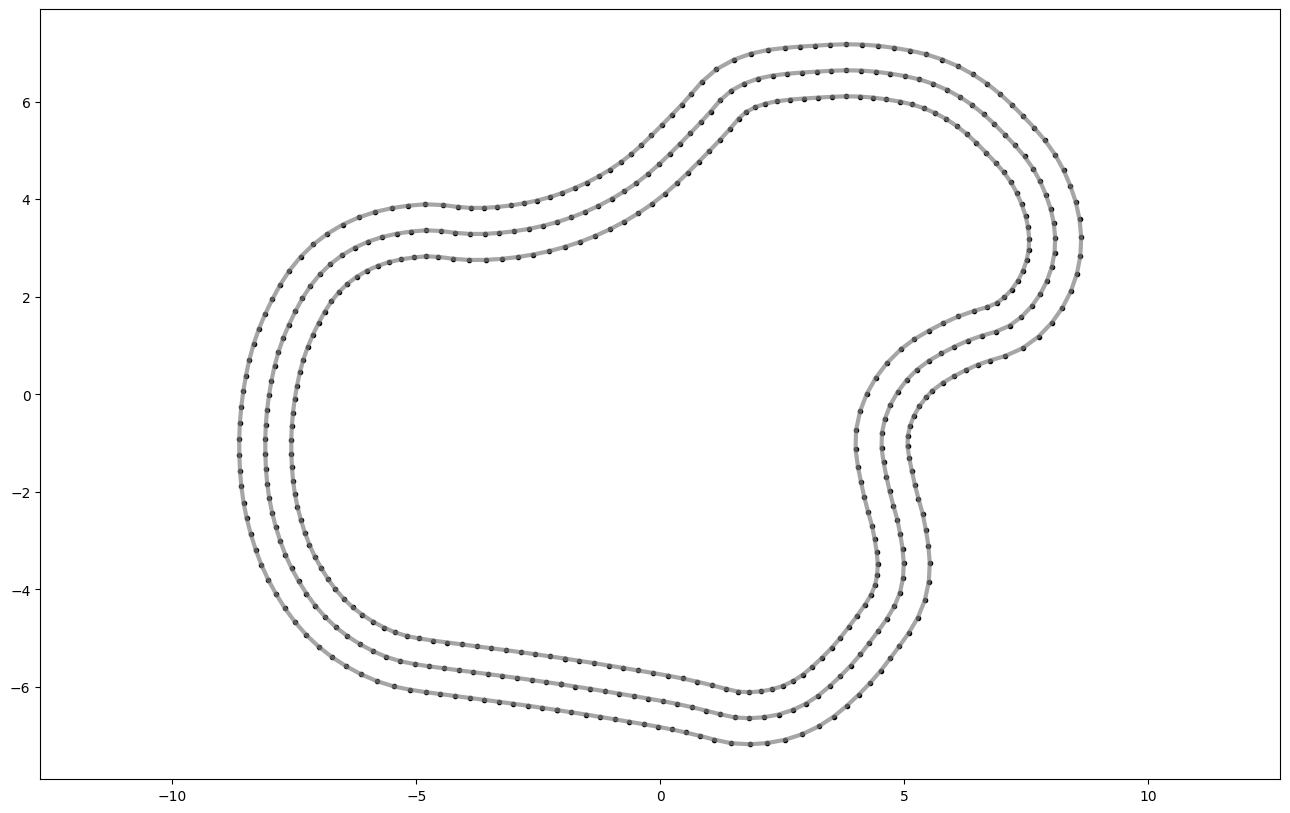

In [2]:
center_line, inner_border, outer_border = track.get_lines()
track.plot(center_line, inner_border, outer_border)

### Track with PERC_WIDTH

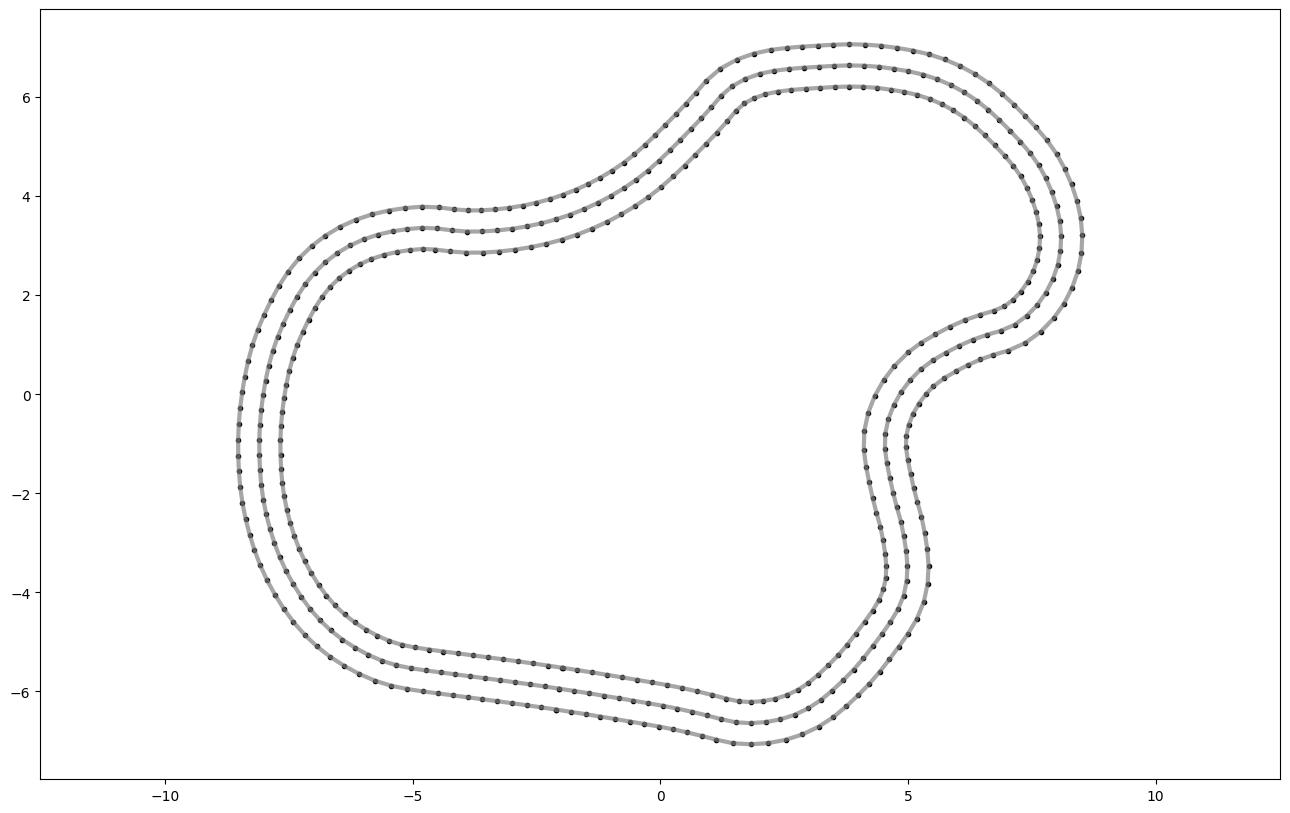

In [3]:
PERC_WIDTH = 0.8

_, inner_border_PERC_WIDTH, outer_border_PERC_WIDTH = track.get_lines(PERC_WIDTH)
track.plot(center_line, inner_border_PERC_WIDTH, outer_border_PERC_WIDTH)

### Race line calculation

In [4]:
LINE_ITERATIONS = 5

race_line = rl.create(
    center_line,
    inner_border_PERC_WIDTH,
    outer_border_PERC_WIDTH,
    iterations=LINE_ITERATIONS,
)

Progress:  |██████████████████████████████████████████████████| 100.0% Complete



### Race line with PERC_WIDTH

These should be the same:  ((160, 2), (160, 2))
Original centerline length: 48.07
New racing line length: 47.94


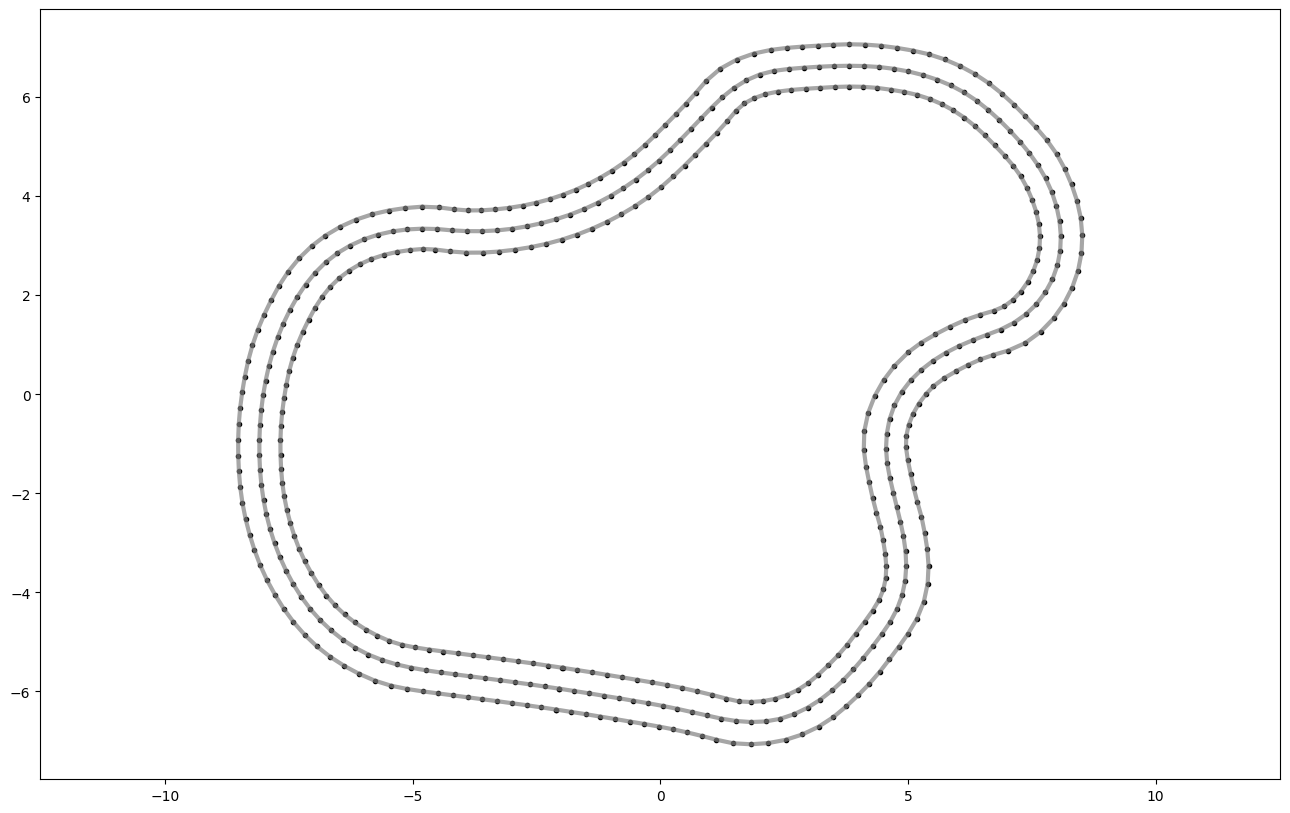

In [5]:
track.plot(race_line, inner_border_PERC_WIDTH, outer_border_PERC_WIDTH)

print("These should be the same: ", (center_line.shape, race_line.shape))
print("Original centerline length: %0.2f" % LineString(center_line).length)
print("New racing line length: %0.2f" % LineString(race_line).length)

### Race line with original track

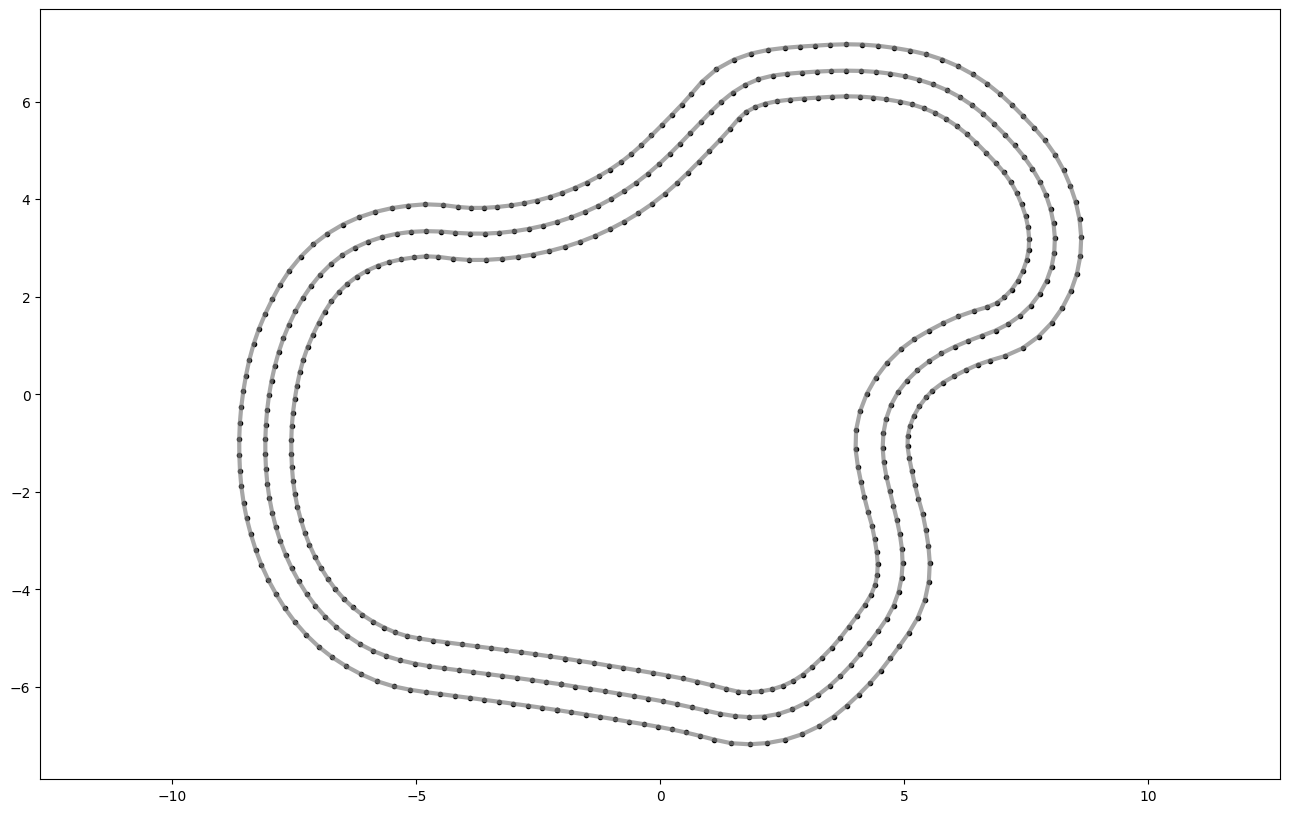

In [6]:
track.plot(race_line, inner_border, outer_border)

### Save race line

In [7]:
rl.save(race_line, PERC_WIDTH, LINE_ITERATIONS)

Writing numpy binary to race_lines/rogue_circuit-race-line-5-0.8.npy
